In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('fivethirtyeight')
import seaborn as sns
import pandas as pd
from datetime import datetime,timedelta
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

In [2]:
plt.style.use('classic')

In [3]:
df=pd.read_csv('Lucknow whether data.csv')

In [4]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [6]:
df.isna().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [7]:
# removing null features
df.drop(columns=[' _heatindexm',' _precipm',' _wgustm',' _windchillm'],axis=1,inplace=True)

In [8]:
df

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,0,25.0,1005.0,0,0,34.0,0,0,4.0,320.0,NW,11.1
100986,20170424-09:00,Haze,14.0,0,0,16.0,1003.0,0,0,38.0,0,0,4.0,320.0,NW,22.2
100987,20170424-12:00,Haze,12.0,0,0,14.0,1002.0,0,0,36.0,0,0,4.0,270.0,West,18.5
100988,20170424-15:00,Haze,15.0,0,0,27.0,1004.0,0,0,32.0,0,0,2.0,320.0,NW,3.7


In [9]:
# converting datetime from obj to datetime
df['datetime_utc']=pd.to_datetime(df['datetime_utc'].apply(lambda x:datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))
df['datetime_utc'].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime_utc, dtype: datetime64[ns]

In [10]:
df.set_index('datetime_utc',drop=True,inplace=True)

In [11]:
for i in df.columns:
    df.rename(columns={i:i.replace("_","").strip()},inplace=True)


In [12]:
df.index.name='datetime'

In [13]:
df

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
datetime,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-24 06:00:00,Haze,17.0,0,0,25.0,1005.0,0,0,34.0,0,0,4.0,320.0,NW,11.1
2017-04-24 09:00:00,Haze,14.0,0,0,16.0,1003.0,0,0,38.0,0,0,4.0,320.0,NW,22.2
2017-04-24 12:00:00,Haze,12.0,0,0,14.0,1002.0,0,0,36.0,0,0,4.0,270.0,West,18.5


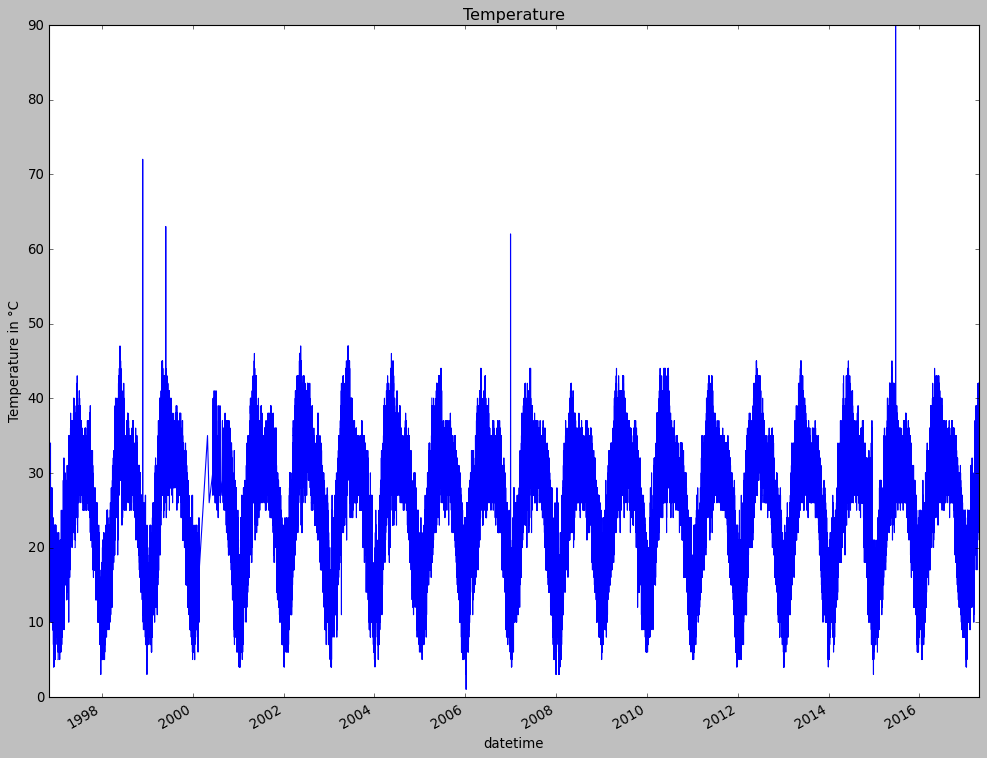

In [14]:
df['tempm'].plot(figsize=(15,12))
plt.ylabel("Temperature in °C")
plt.title('Temperature')
plt.show()

• There is a seasonal pattern in temperature. <br>
• There is some missing data between 2000 and 2001. <br>
• Outliers


<AxesSubplot:xlabel='datetime'>

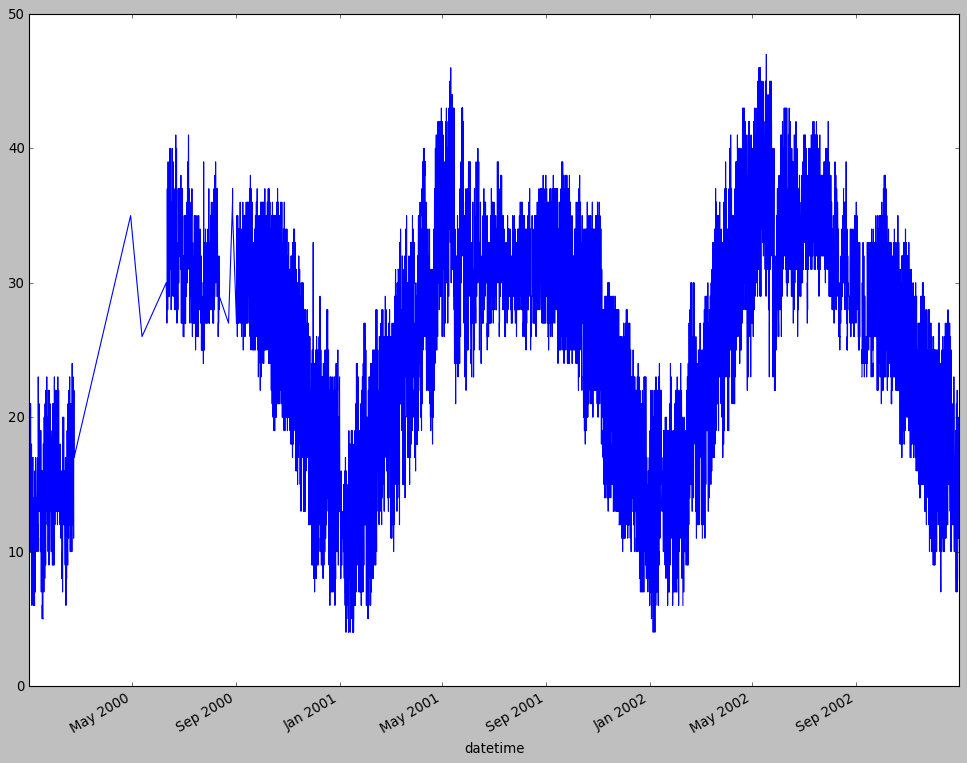

In [15]:
df.loc['2000':'2002']['tempm'].plot(figsize=(15,12))

Data is missing between may 2000 & sep 2000. To avoid this, we will use this data from 2001 onwards as we have enough data and there is not such significant trend we will miss because of this.

In [16]:
df=df.loc['2001':]

In [17]:
df

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
datetime,,,,,,,,,,,,,,,
2001-01-01 00:30:00,Scattered Clouds,13.0,0,0,94.0,1011.0,0,0,14.0,0,0,1.4,90.0,East,9.3
2001-01-01 01:30:00,Scattered Clouds,12.0,0,0,94.0,1011.0,0,0,13.0,0,0,1.3,70.0,ENE,11.1
2001-01-01 02:30:00,Mostly Cloudy,12.0,0,0,94.0,1012.0,0,0,13.0,0,0,1.3,50.0,NE,13.0
2001-01-01 03:30:00,Light Thunderstorms and Rain,13.0,0,0,100.0,1013.0,1,0,13.0,1,0,1.0,140.0,SE,5.6
2001-01-01 04:30:00,Light Thunderstorms and Rain,12.0,0,0,94.0,1014.0,1,0,13.0,1,0,1.0,110.0,ESE,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-24 06:00:00,Haze,17.0,0,0,25.0,1005.0,0,0,34.0,0,0,4.0,320.0,NW,11.1
2017-04-24 09:00:00,Haze,14.0,0,0,16.0,1003.0,0,0,38.0,0,0,4.0,320.0,NW,22.2
2017-04-24 12:00:00,Haze,12.0,0,0,14.0,1002.0,0,0,36.0,0,0,4.0,270.0,West,18.5


In [18]:
# we are dealing with temperature only, hence
newdf=pd.DataFrame(df['tempm'])

In [19]:
newdf

,tempm
datetime,
2001-01-01 00:30:00,14.0
2001-01-01 01:30:00,13.0
2001-01-01 02:30:00,13.0
2001-01-01 03:30:00,13.0
2001-01-01 04:30:00,13.0
...,...
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0


In [20]:
newdf.dropna(inplace=True)

In [21]:
newdf.index.minute.value_counts()

0     46991
30    30276
21      143
51       29
50       15
25        3
40        3
38        3
20        2
2         1
45        1
22        1
53        1
52        1
3         1
15        1
34        1
32        1
Name: datetime, dtype: int64

There is irregularity in this time interval, So we will resample the data hourly and interpolate.

In [22]:
newdf=newdf.resample('H').mean().interpolate()
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142987 entries, 2001-01-01 00:00:00 to 2017-04-24 18:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tempm   142987 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


<AxesSubplot:xlabel='datetime'>

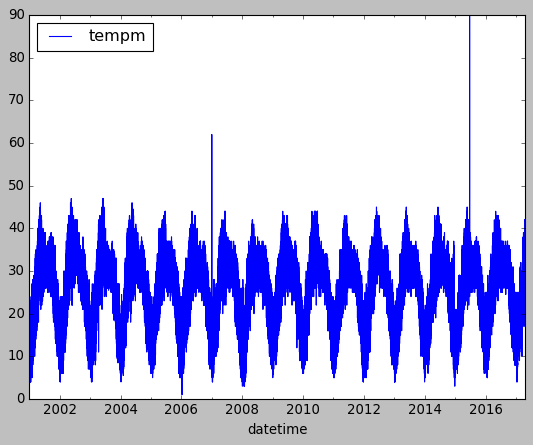

In [23]:
newdf.plot()

<AxesSubplot:>

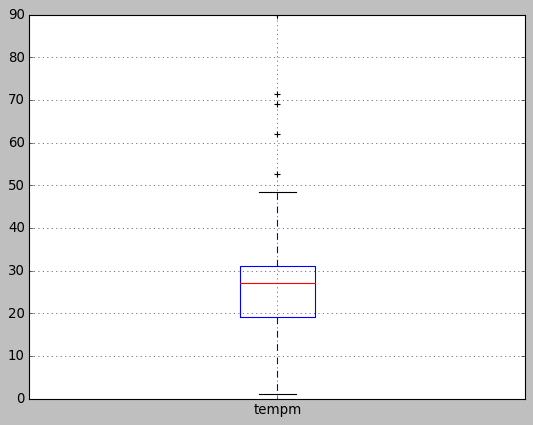

In [24]:
newdf.boxplot()

In [25]:
# removing outliers, keeping temperature values under 60°C only
newdf=newdf[newdf['tempm']<60]

<AxesSubplot:xlabel='datetime'>

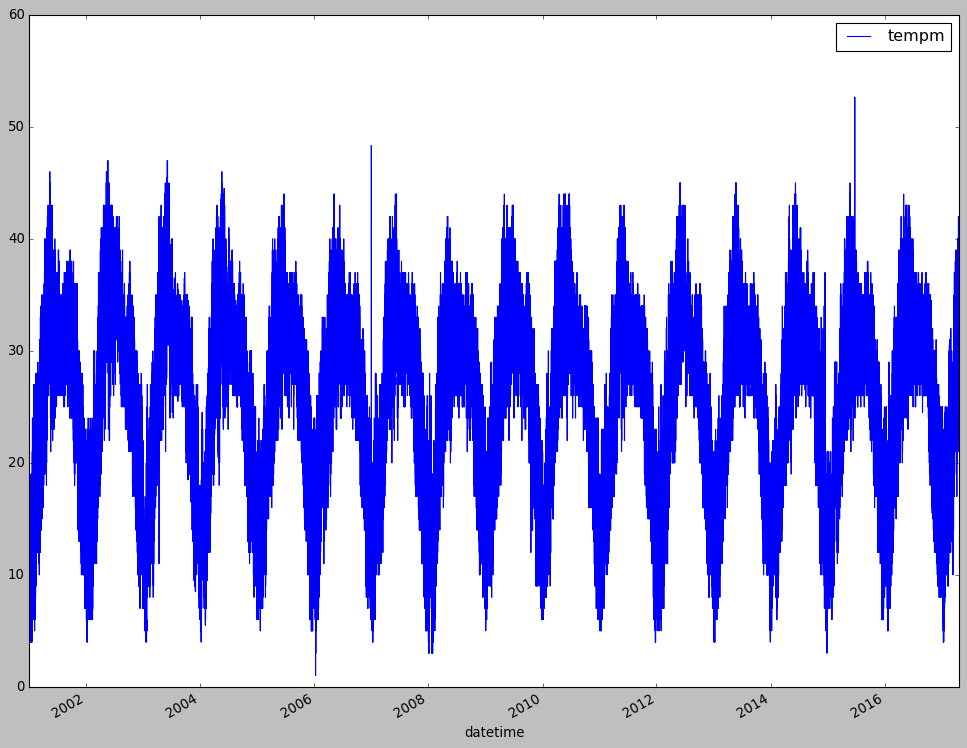

In [26]:
newdf.plot(figsize=(15,12))

In [27]:
# plotting aggregrate values
def plotaggregratevalues(data,column):
    plt.figure(figsize=(18,25))
    ax1=plt.subplot(4,2,1)
    data[column].groupby(data.index.year).mean().plot(ax=ax1,title="Yearly mean values")
    ax1.set_xlabel('Years')
    ax1.set_ylabel(column)
    ax2=plt.subplot(4,2,2)
    data[column].groupby(data.index.month).mean().plot(ax=ax2,title="Monthly mean values")
    ax2.set_xlabel('Months')
    ax2.set_ylabel(column)
    ax3=plt.subplot(4,2,3)
    data[column].groupby(data.index.weekday).mean().plot(ax=ax3,title="Weekly mean values")
    ax3.set_xlabel('Weekday')
    ax3.set_ylabel(column)
    ax4=plt.subplot(4,2,4)
    data[column].groupby(data.index.hour).mean().plot(ax=ax4,title="Hourly mean values")
    ax4.set_xlabel('Hours')
    ax4.set_ylabel(column)

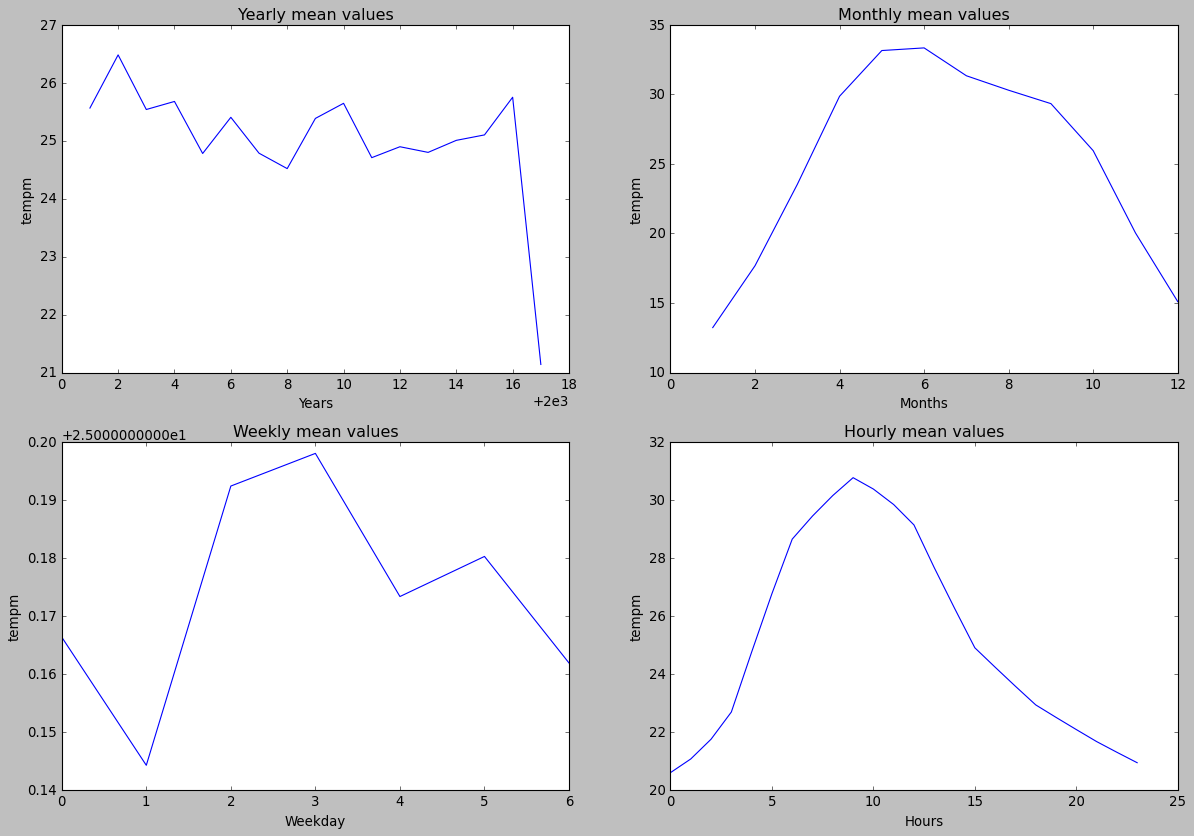

In [28]:
plotaggregratevalues(newdf,'tempm')

• from monthly data, it is clear that high temperature is seen in the month of may and june mostly. <br>
• it can be seen that 2002 was hottest. <br>
• strange but, most heated time is around 10 is seen in hourly data.

<AxesSubplot:ylabel='Density'>

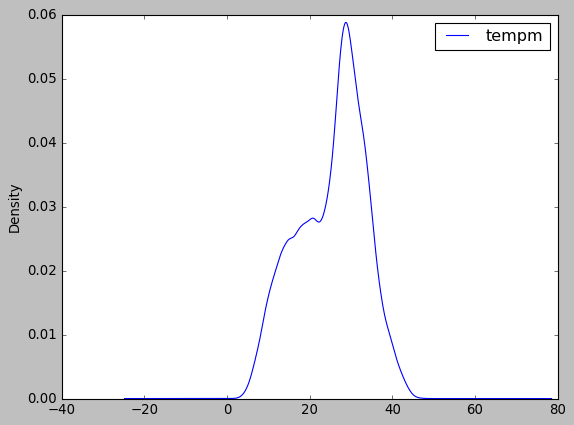

In [29]:
# distribution plot of temperature
newdf.plot(kind='density')

High density of arounf 30°. It indicated that city is mpderately hot most of the times

#### Checking data stationarity analysis of trend etc.

Text(0, 0.5, 'Residuals')

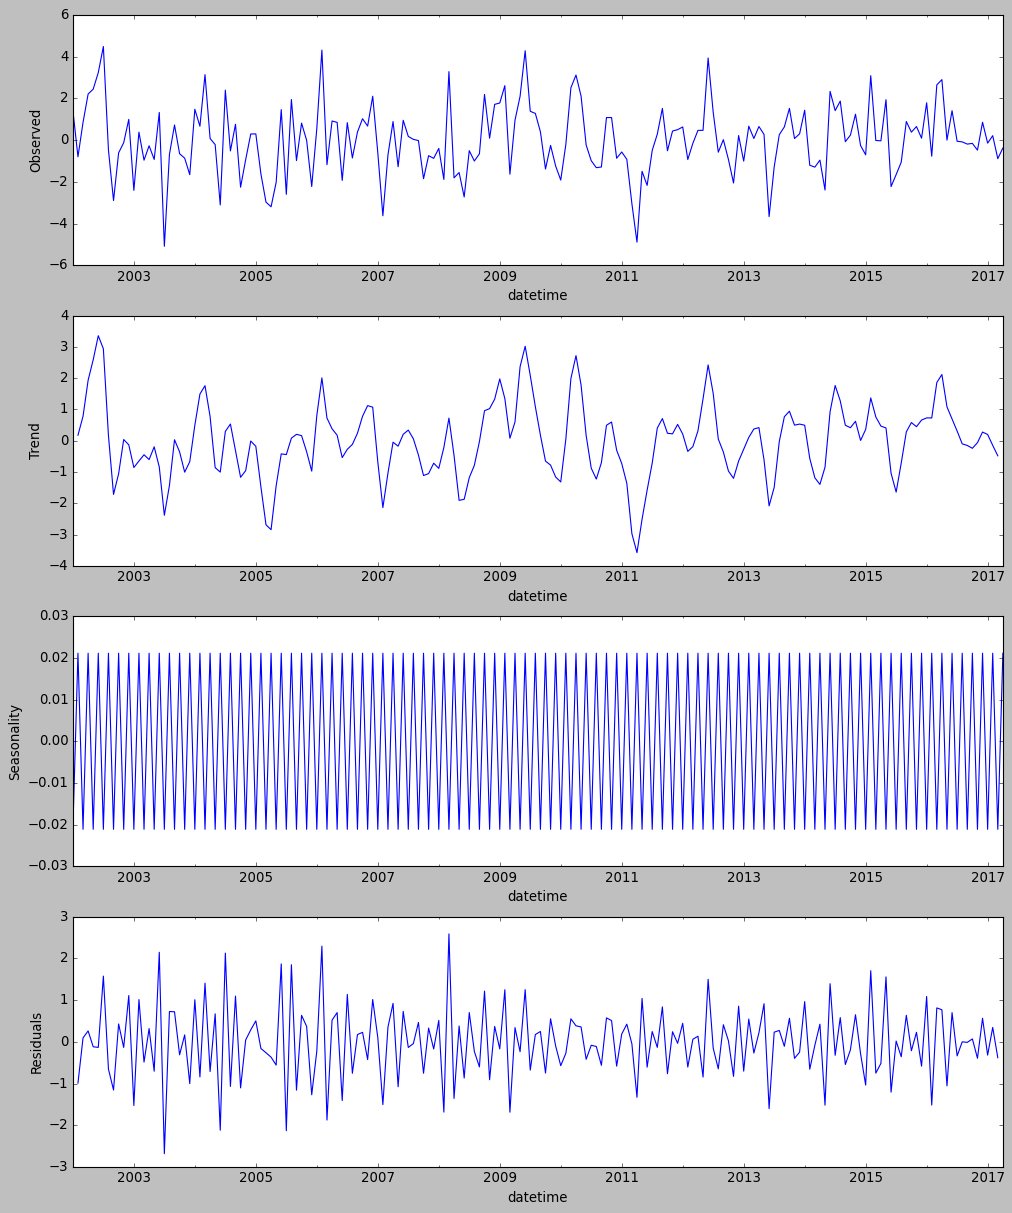

In [30]:
# differencing with 12 as data is seasonal because of yearly periodic pattern. Also we are resampling the data monthly
decompose=sm.tsa.seasonal_decompose(newdf.resample('M').mean().diff(12).dropna(),model = 'additive',period=2)
plt.figure(figsize=(15,18))
ax1=plt.subplot(411)
decompose.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax2=plt.subplot(412)
decompose.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
ax3=plt.subplot(413)
decompose.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonality')
ax4=plt.subplot(414)
decompose.resid.plot(ax=ax4)
ax4.set_ylabel('Residuals')

In [31]:
# stationary ?
results = adfuller(newdf.resample('m').mean().diff(12).dropna())
results

(-4.911856498240786,
 3.306773601265823e-05,
 12,
 171,
 {'1%': -3.4691814633722453,
  '5%': -2.878595143532943,
  '10%': -2.5758625549741803},
 579.3586740648997)

as p value is very low than 0.05, our data is stationary with differencing of 12.

In [32]:
y=newdf.resample('M').mean()

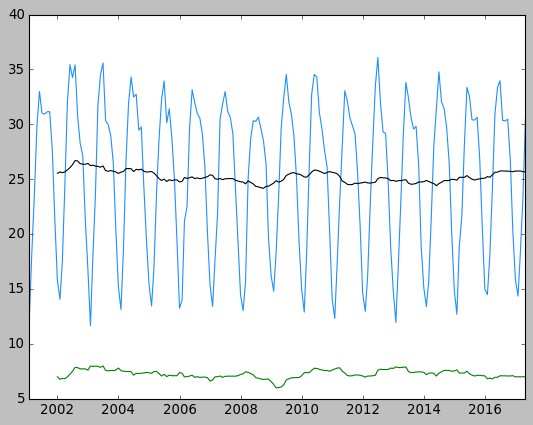

In [33]:
plt.plot(y, color='dodgerblue')
plt.plot(y.rolling(12).mean(), color='black', label='rolling mean')
plt.plot(y.rolling(12).std(), color='green', label='rolling mean')
plt.show()

Se, feature has somehow constant mean and std.

In [34]:
train = newdf[:'2015']
test = newdf['2016':]

In [35]:
# resampling the data monthly and will predict the average monthly temperature.
traindata = train['tempm'].resample('M').mean()
testdata = test['tempm'].resample('M').mean()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


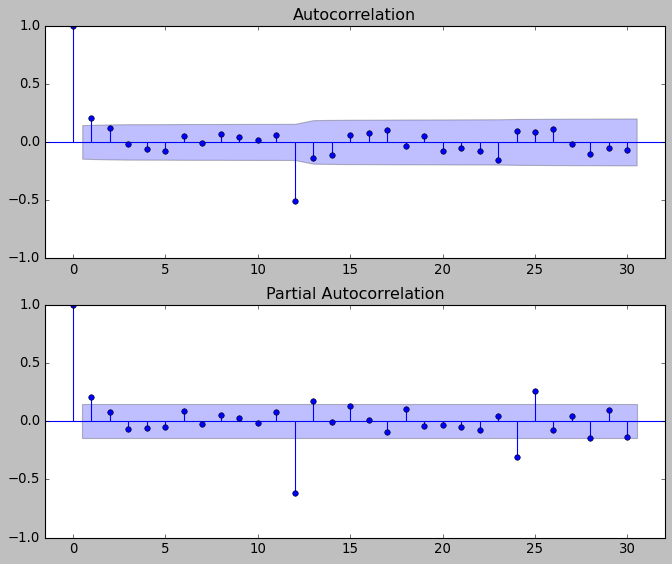

In [36]:
# To get non-seasonal orders of the SARIMAX Model we will first use ACF & PACF plots
plt.figure(figsize=(10,8))

ax1 = plt.subplot(211)
acf = plot_acf(newdf.resample('m').mean().diff(12).dropna(),lags=30,ax=ax1)

ax2 = plt.subplot(212)
pacf = plot_pacf(newdf.resample('m').mean().diff(12).dropna(),lags=30,ax=ax2)

nearly 1 value for both q and p.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


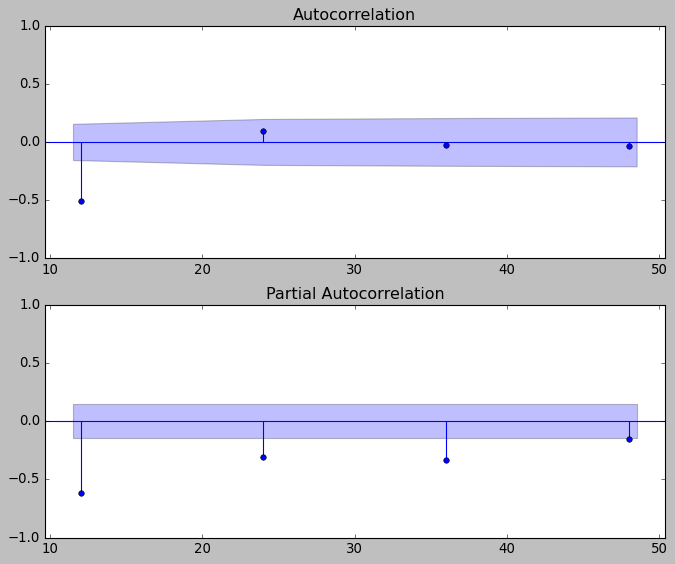

In [37]:
# To get seasonal orders of the SARIMAX Model we will first use ACF & PACF plots at seasonal lags 

lags = [12*i for i in range(1,5)]

plt.figure(figsize=(10,8))

ax1 = plt.subplot(211)
acf = plot_acf(newdf.resample('m').mean().diff(12).dropna(),lags=lags,ax=ax1)

ax2 = plt.subplot(212)
pacf = plot_pacf(newdf.resample('m').mean().diff(12).dropna(),lags=lags,ax=ax2)

Here, acf cuts off after 1, so q=1 or ma = 1. <br>
pacf is trailing away so will take it as 0. p=0.

<h4> Model Sarimax </h4>

In [38]:
model=SARIMAX(traindata,order=(1,0,1),seasonal_order=(0,1,1,12),trend='n')
result=model.fit()

In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              tempm   No. Observations:                  180
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -276.614
Date:                            Sun, 10 Jul 2022   AIC                            561.229
Time:                                    22:40:16   BIC                            573.724
Sample:                                01-31-2001   HQIC                           566.300
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4562      0.190      2.400      0.016       0.084       0.829
ma.L1         -0.1403      0.202     -0.693      0.488      -0.537       0.256
ma.S.L12      -0.9122      0.120     -7.611      0.000      -1.147      -0.677
sigma2         1.3932      0.185      7.518      0.000       1.030       1.756
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.75   Prob(JB):                         0.60
Heteroskedasticity (H):               0.55   Skew:                             0.18
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
print(np.mean(np.abs(result.resid)))

2.6413621645822944


~ 2.6°C average temperature error. 

In [41]:

r2_score(testdata.values,result.predict(start=testdata.index[0],end=testdata.index[-1]))

0.9832413514361815

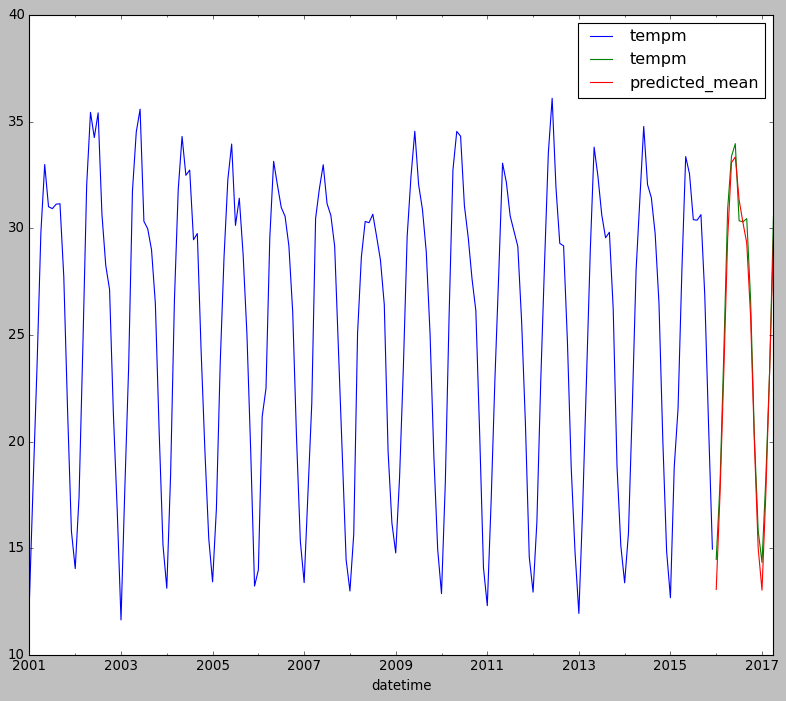

In [42]:
traindata.plot(figsize=(12,10))
testdata.plot()
result.predict(start=testdata.index[0],end=testdata.index[-1]).plot()
plt.legend()

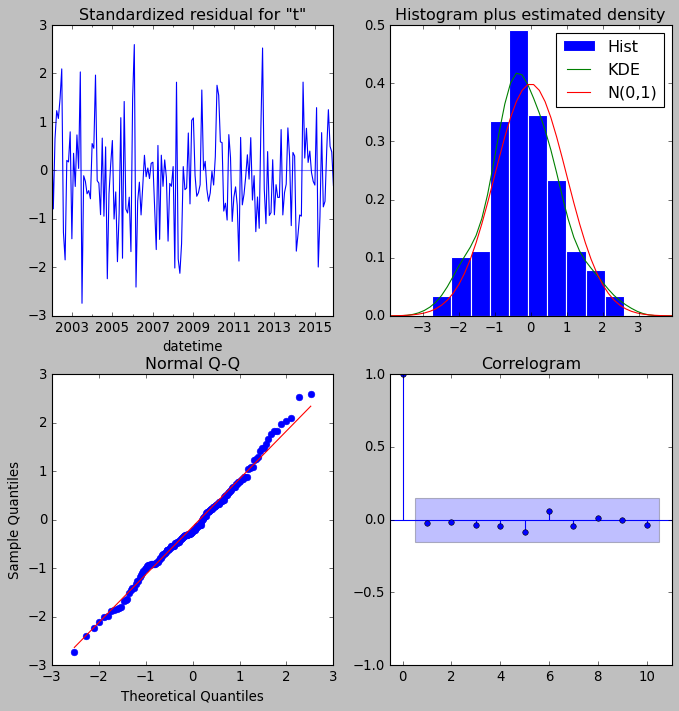

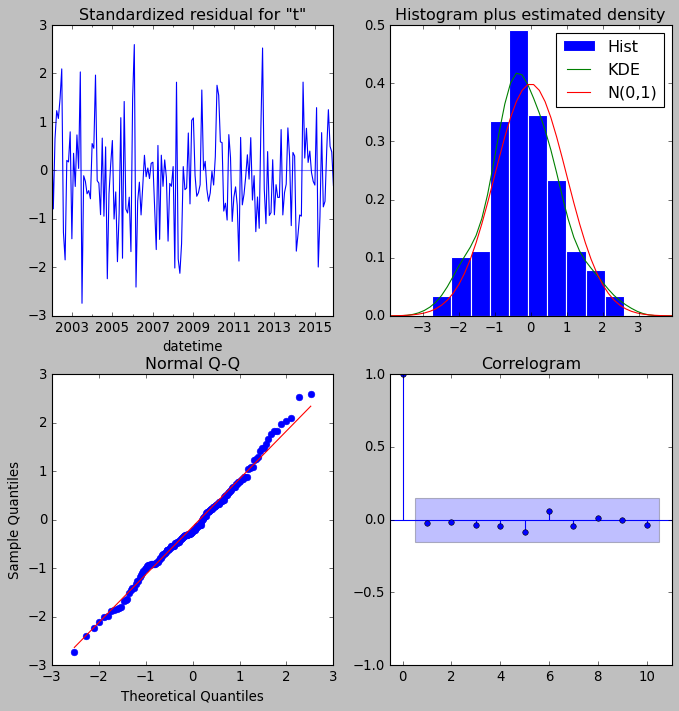

In [49]:
result.plot_diagnostics(figsize=(10,10))

In [52]:
testdata.tail()

datetime
2016-12-31    15.823589
2017-01-31    14.339046
2017-02-28    18.260789
2017-03-31    23.330309
2017-04-30    30.538091
Freq: M, Name: tempm, dtype: float64

In [72]:
forecast_date_start=testdata.index[-1]
forecast_date_end=testdata.index[-1]+timedelta(days=365+31*8-3) # next year end

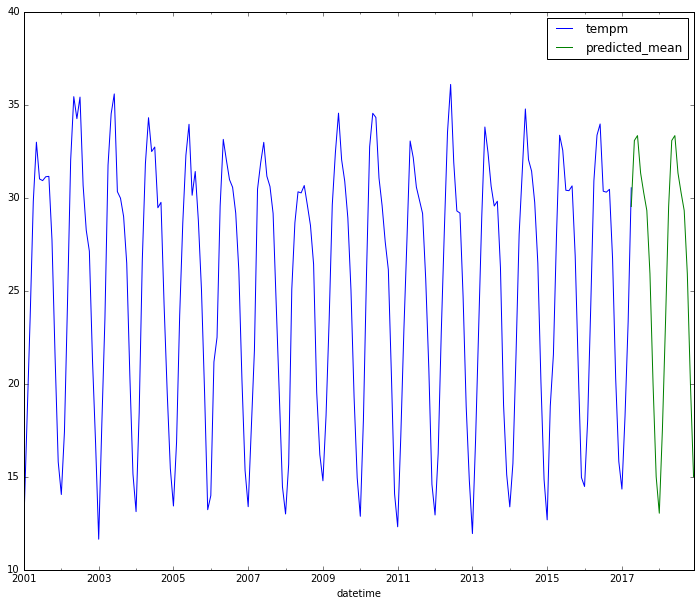

In [76]:
forecast=result.predict(start=forecast_date_start,end=forecast_date_end)
newdf.resample('M').mean().plot(figsize=(12,10))
forecast.plot()
plt.legend()

### Conclusion
Seasonal Arima is able to predict the monthly average temperature with R2 score nearly 98% which is pretty good. The error in predicted temperature on train data is around 2.6°